In [1]:
import tweepy
import re
import pickle
from tweepy import OAuthHandler

In [2]:
# Initializing the keys
consumer_key = 'zzhDmLCUo5eNqXIc0c44M5eZw'
consumer_secret = 'LRNlGR4Ye8qBblqXBMLfWJmnKokpB7h4GPXC5QmOGzOIyiSdNy'
access_token = '1248951228349829126-Gzkc82DJPnJEwN1JUssTWqawmciwOR'
access_secret = 'Kr2VoC3ePZxHK0Aaj3kTG2joQMdOVDniZnoOZzncChbes'

In [27]:
auth = OAuthHandler(consumer_key,consumer_secret) #verifying authenticity of application
auth.set_access_token(access_token,access_secret) #verifying if you have right to fetch tweets
args = ['friend'] #search token
api = tweepy.API(auth,timeout=10) #if nothing found, disconnect after 10 sec.

In [28]:
# Fetch real time tweets

list_tweets = []
query = args[0]
if len(args)==1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='recent').items(100):
        list_tweets.append(status.text) #status is a json object
list_tweets

['My Friend Whose Name Is Rory https://t.co/lZhTwCCxVE via @drewdog2060_',
 "@Lima_kazaure There is nothing you can do about it,after all Aboki means my friend. So what's the fuse all about?🤣🤣",
 'Wayne, my friend, of course, the paid whores in the MSM will not report on this and for one reason only, there is "… https://t.co/R0bgiUZISH',
 "@NikkiStix55 Ignore her.  Hubby having fun with your daughter in your garden. People's tempers are getting very sho… https://t.co/KlXBihieFD",
 '@taeyoign say hello to my friend letty\n\n[@Johnnylseo @meineanjo]',
 '@Chelzlashawn This is not color purple friend. This is more like YouTube lol',
 "@nocontextamci One: Don't pick up the phone\nYou know he's only callin' 'cause he's drunk and alone\nTwo: Don't let h… https://t.co/OV5xQIZp3r",
 '@MeghShukla15 Good evening friend',
 '#MARVEL Super War @@Program@@E7F9L221B https://t.co/IhUdJ39ujy https://t.co/gaSWF5Iycx',
 '@joanmcos HAPPY DAY💞💞 MUCH LOVE DEAR FRIEND 💞💞MANY HUGS💞💞 GOD BLESS💞💞😘😘',
 'You can, 

In [29]:
# Unpickling the classifier and vectorizer
with open('classifier.pickle','rb') as f:
    clf = pickle.load(f)
with open('tfidfmodel.pickle','rb') as f:
    tfidf = pickle.load(f)

In [30]:
#checking if it works
clf.predict(tfidf.transform(['You are a very amazing person']))

array([1])

In [31]:
# Preprocessing & Sentiment classification

for tweet in list_tweets:
    tweet = re.sub(r'^http://t.co/[a-zA-Z0-9]*\s',' ',tweet)
    tweet = re.sub(r'\s+https://t.co/[a-zA-Z0-9]*\s',' ',tweet)
    tweet = re.sub(r'\s+https://t.co/[a-zA-Z0-9]*$',' ',tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r'\W',' ',tweet)
    tweet = re.sub(r'\d',' ',tweet)
    tweet = re.sub(r'\s+[a-z]\s+',' ',tweet)
    tweet = re.sub(r'\s+[a-z]$',' ',tweet)
    tweet = re.sub(r'^[a-z]\s+',' ',tweet)
    print(tweet)
    sent = clf.predict(tfidf.transform([tweet]).toarray())
    print("Sentiment :",sent)

my friend whose name is rory via  drewdog    _
Sentiment : [0]
 lima_kazaure there is nothing you can do about it after all aboki means my friend  so what is the fuse all about   
Sentiment : [0]
wayne  my friend  of course  the paid whores in the msm will not report on this and for one reason only  there is    
Sentiment : [0]
 nikkistix   ignore her   hubby having fun with your daughter in your garden  people tempers are getting very sho  
Sentiment : [1]
 taeyoign say hello to my friend letty    johnnylseo  meineanjo 
Sentiment : [1]
 chelzlashawn this is not color purple friend  this is more like youtube lol
Sentiment : [1]
 nocontextamci one  don pick up the phone you know he is only callin   cause he is drunk and alone two  don let 
Sentiment : [0]
 meghshukla   good evening friend
Sentiment : [1]
 marvel super war   program f b 
Sentiment : [1]
 joanmcos happy day   much love dear friend   many hugs   god bless    
Sentiment : [1]
you can  but still he wont change  nature  amp  

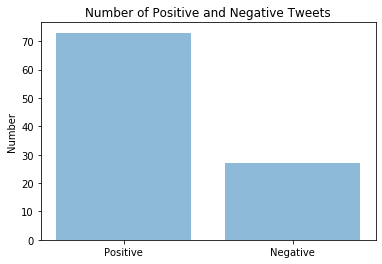

In [32]:
# Plotting the result

total_pos = 0
total_neg = 0

for tweet in list_tweets:
    tweet = re.sub(r'^http://t.co/[a-zA-Z0-9]*\s',' ',tweet)
    tweet = re.sub(r'\s+https://t.co/[a-zA-Z0-9]*\s',' ',tweet)
    tweet = re.sub(r'\s+https://t.co/[a-zA-Z0-9]*$',' ',tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r'\W',' ',tweet)
    tweet = re.sub(r'\d',' ',tweet)
    tweet = re.sub(r'\s+[a-z]\s+',' ',tweet)
    tweet = re.sub(r'\s+[a-z]$',' ',tweet)
    tweet = re.sub(r'^[a-z]\s+',' ',tweet)
    sent = clf.predict(tfidf.transform([tweet]).toarray())
    if sent[0] ==1 :
        total_pos += 1
    else:
        total_neg += 1

# Plotting the bar chart

import matplotlib.pyplot as plt
import numpy as np

objects = ['Positive', 'Negative']
y_pos = np.arange(len(objects))
plt.bar(y_pos, [total_pos,total_neg], alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number')
plt.title('Number of Positive and Negative Tweets')

plt.show()